<a href="https://colab.research.google.com/github/FERMEN23/CNN/blob/main/GunAndHelmet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Configuración de nuestro entorno de ejecución

Nota: Es necesario utilizar la GPU

Las celdas que no tienen el módulo time, es dado que su tiempo de ejecución es de milisegundo

In [ ]:
%%time
! git clone https://github.com/roboflow-ai/Monk_Object_Detection.git

Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 3747, done.
remote: Total 3747 (delta 0), reused 0 (delta 0), pack-reused 3747
Receiving objects: 100% (3747/3747), 132.20 MiB | 24.84 MiB/s, done.
Resolving deltas: 100% (800/800), done.
Checking out files: 100% (4032/4032), done.
CPU times: user 113 ms, sys: 19.5 ms, total: 133 ms
Wall time: 12 s


In [ ]:
%%time
! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

     |████████████████████████████████| 352.6 MB 13 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Created wheel for dicttoxml: filename=dicttoxml-1.7.4-py3-none-any.whl size=17463 sha256=2cfc2f2a5f0e876ee05980183705137363ac10b336dac0ec84c59d9e54deb53f
  Stored in directory: /root/.cache/pip/wheels/18/44/5a/c7b93703f611ae3b50820efbaf265413e6b183a56cbec6f661
Successfully built dicttoxml
  Cloning https://github.com/abhi-kumar/cocoapi.git to /tmp/pip-install-q_cpguc5/pycocotools_125e504ba30e4be188956c53ef7da70c
  Running command git clone -q https://github.com/abhi-kumar/cocoapi.git /tmp/pip-install-q_cpguc5/pycocotools_125e504ba30e4be188956c53ef7da70c
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=263844 sha256=b6e60594d84e7b62a7f27790a98639492399db745aa28239580753c11589b121
  Stored in directory: /tmp/pip-ephem-wheel-cac

In [ ]:
%%time
#Version de tqmd para colab
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip

#Arquitectura de red Efficeintnet
!pip install efficientnet_pytorch
!pip install tensorboardX

     \ 91 kB 355 kB/s
  Created wheel for tqdm: filename=tqdm-4.28.1-py2.py3-none-any.whl size=47878 sha256=bba39608fa71f0b1d190e2e05043c1226810d7a6d801d11bcd11a8385c46720f
  Stored in directory: /tmp/pip-ephem-wheel-cache-wpultq9q/wheels/b5/36/d9/593e7ac06d343d0a32138fa6c402dc3a0bd31442c9fe53f76c
Successfully built tqdm
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.62.3
    Uninstalling tqdm-4.62.3:
      Successfully uninstalled tqdm-4.62.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 2.2.4 requires tqdm<5.0.0,>=4.38.0, but you have tqdm 4.28.1 which is incompatible.
panel 0.12.1 requires tqdm>=4.48.0, but you have tqdm 4.28.1 which is incompatible.
fbprophet 0.7.1 requires tqdm>=4.36.1, but you have tqdm 4.28.1 which is incompatible.
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl

##Obtener Datos procesador en Roboflow

Recuerde que el espacio ENLACE corresponde al código de descarga en el formato COCO Json proporcionado por Roboflow 

In [ ]:
%%time
!curl -L "ENLACE" > \
roboflow.zip; unzip roboflow.zip; \
rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   887  100   887    0     0   1586      0 --:--:-- --:--:-- --:--:--  1586
100 11.2M  100 11.2M    0     0  5707k      0  0:00:02  0:00:02 --:--:-- 13.8M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/Captura-de-pantalla-de-2020-09-16-21-51-05_png.rf.e8d187ae9943c81da50943918e96df25.jpg  
 extracting: test/Captura-de-pantalla-de-2020-09-16-21-51-43_png.rf.fa6898cbf91fa91c09226ea5be0880d0.jpg  
 extracting: test/Captura-de-pantalla-de-2020-09-16-21-51-48_png.rf.b44ff39a702aaf2d9e6d928ea978e928.jpg  
 extracting: test/Captura-de-pantalla-de-2020-09-16-21-53-19_png.rf.0ac8b9bb7d0fca1be1b7779926a03b18.jpg  
 extracting: test/Captura-de-pantalla-de-2020-09-16-22-01-58_png.rf.4be2591abf48a209ed2def39725ad6b0.jpg  
 extracting: test/Captura-de-pa

##Estructura para los datos 

En las siguientes tres celdas, movemos los datos a una estructura que la biblioteca de detección de imágenes esperará

In [ ]:
!mkdir War
!mkdir War/annotations
!mkdir War/Annotations
!mkdir War/Images

In [ ]:
%cp train/_annotations.coco.json War/annotations/instances_Images.json

In [ ]:
%cp train/*.jpg War/Images/

##Entrenamiento

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [ ]:
%%time
from train_detector import Detector

CPU times: user 1.1 s, sys: 774 ms, total: 1.87 s
Wall time: 25.9 s


In [ ]:
gtf = Detector();

In [ ]:
#dirige el modelo hacia la estructura de archivos
root_dir = "./";
coco_dir = "War";
img_dir = "./";
set_dir = "Images";

In [ ]:
%%time
#Preparar los datos
gtf.Train_Dataset(root_dir, coco_dir, img_dir, set_dir, batch_size=8, image_size=512, use_gpu=True)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
CPU times: user 11.6 ms, sys: 27.5 ms, total: 39 ms
Wall time: 77.8 ms


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
%%time
gtf.Model();

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth



Loaded pretrained weights for efficientnet-b0
CPU times: user 2.04 s, sys: 1.14 s, total: 3.18 s
Wall time: 15.6 s


In [ ]:
gtf.Set_Hyperparams(lr=0.0001, val_interval=1, es_min_delta=0.0, es_patience=0)

In [ ]:
%%time
gtf.Train(num_epochs=100, model_output_dir="trained/");

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Monk_Object_Detection/4_efficientdet/lib/src/model.py:251: TracerWarning: Using len to get tensor shape might cause the trace to be incorrect. Recommended usage would be tensor.shape[0]. Passing a tensor of different shape might lead to errors or silently give incorrect results.
  if len(inputs) == 2:
Monk_Object_Detection/4_efficientdet/lib/src/utils.py:84: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a consta

CPU times: user 4h 12min 35s, sys: 5min 43s, total: 4h 18min 18s
Wall time: 4h 20min 22s


##Resultados

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [ ]:
from infer_detector import Infer

In [ ]:
gtf2 = Infer();

In [ ]:
%%time
gtf2.Model(model_dir="trained/")

In [ ]:
%%time
import json
with open('train/_annotations.coco.json') as json_file:
    data = json.load(json_file)
class_list = []
for category in data['categories']:
  class_list.append(category['name'])

class_list

['all', 'gun', 'helmet']

In [ ]:
%%time
test_images = [f for f in os.listdir('test') if f.endswith('.jpg')]
import random
img_path = "test/" + random.choice(test_images);
duration, scores, labels, boxes = gtf2.Predict(img_path, class_list, vis_threshold=0.2);

Done. (0.181s)
CPU times: user 202 ms, sys: 27 ms, total: 229 ms
Wall time: 228 ms


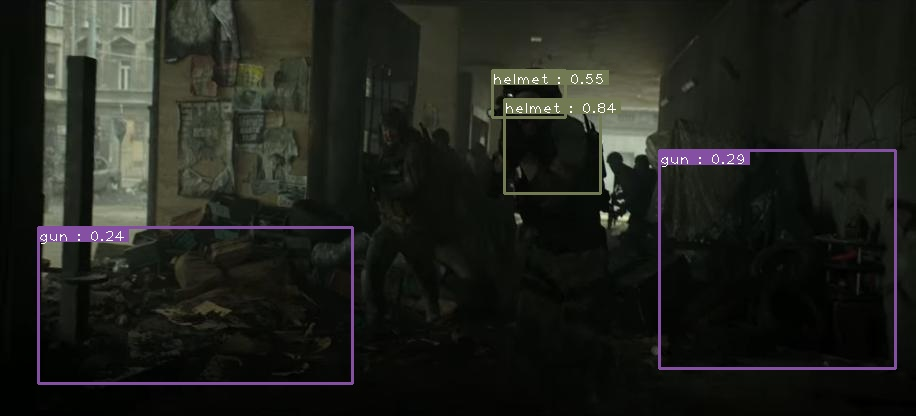

In [ ]:
%%time
from IPython.display import Image
Image(filename='output.jpg') 

##Exportar los pesos de nuestro modelo a nuestra unidad de Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%mkdir trained_export
%cp ./trained/signatrix_efficientdet_coco.onnx ./trained_export/signatrix_efficientdet_coco_$(date +%F-%H:%M).onnx
%cp ./trained/signatrix_efficientdet_coco.pth ./trained_export/signatrix_efficientdet_coco_$(date +%F-%H:%M).pth
%mv ./trained_export/* /content/drive/My\ Drive/